<center><img src="https://btchekeli.github.io/src/My_logos/logo_principal_HB.png" style="height:300px"></center>
<div class="alert alert-info" role="alert">
  <center><h6 id="Python-pour-la-Data-Science">La donnée est l’actif stratégique de la révolution numérique</h6></center>
</div>

<hr style="border-width:2px;border-color:#75DFC1">
    <center><h2>Analyse budget et consommation avec Python</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

<blockquote style="border-left: 5px solid #686a91;">
    - Source des données : ---
</blocquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Chargemebnt des données

budget = pd.read_csv("Budget.csv", sep=";")
comptes = pd.read_excel("Comptes.xlsx")
conso2014 = pd.read_csv("Conso2014.csv", sep=";")
conso2015 = pd.read_csv("Conso2015.csv", sep=";")
conso2016 = pd.read_csv("Conso2016.csv", sep=";")
conso2017 = pd.read_csv("Conso2017.csv", sep=";")
scenario = pd.read_excel("Scenario.xlsx")
services = pd.read_excel("Services.xlsx")
sites = pd.read_excel("Sites.xlsx")

In [3]:
# dictionnaire pour renommer les colonnes et corriger les noms de départements
dict_rename = {"Site": "CodeInsee", "Compte": "AccountKey" , "Année": "Annee", "Scenario": "ScenarioKey", 
             "Service": "DepartmentGroupKey"}
dict_replace = {"10" : "Aube", "11": "Aude", "13": "Bouches-du-Rhône"}

In [4]:
# Pour chaque data, changer les colonnes si possible

budget.rename(columns=dict_rename, inplace=True)

comptes.rename(columns=dict_rename, inplace=True)

conso2014.rename(columns=dict_rename, inplace=True)

conso2015.rename(columns=dict_rename, inplace=True)

conso2016.rename(columns=dict_rename, inplace=True)

conso2017.rename(columns=dict_rename, inplace=True)



<blockquote style="border-left: 5px solid #686a91;">
On remarque que certains codes pastaux ont quatre chiffres. Après vérication, ce sont les codes postaux qui commencent par zero. le fait de les enregistrer comme "int" agis sur ces chiffres. On corrige dans ce cas
</blocquote>

In [5]:

budget["CodeInsee"] = budget["CodeInsee"].astype(str)
budget["CodeInsee"] = budget["CodeInsee"].apply(lambda x: "0" + x if len(x) == 4 else x)

In [6]:
budget.sample(10)

ScenarioKey CodeInsee  DepartmentGroupKey  AccountKey        Date  \
586             2     67482                   1          73  01/02/2016   
1650            2     44109                   6          80  01/05/2016   
3572            2     78358                   6          73  01/09/2016   
874             2     06088                   2          60  01/03/2016   
2380            2     78646                   1          66  01/06/2016   
3832            2     67482                   6          61  01/10/2016   
1134            2     78358                   6          52  01/03/2016   
167             2     06088                   6          81  01/01/2016   
3059            2     75056                   1          77  01/08/2016   
3706            2     06088                   2          73  01/10/2016   

      Montant  
586      5000  
1650     7500  
3572     2200  
874    101000  
2380     4800  
3832    26000  
1134    55000  
167      2800  
3059     4800  
3706     1100

<blockquote style="border-left: 5px solid #686a91;">
Vérifions les données manquantes et les doublons
</blocquote>

In [7]:
manquant = budget.isnull().sum()
doublons = budget.duplicated().sum()


print(manquant, "\n" + "---------", "\n", doublons)

ScenarioKey           0
CodeInsee             0
DepartmentGroupKey    0
AccountKey            0
Date                  0
Montant               0
dtype: int64 
--------- 
 2


In [8]:
budget.drop_duplicates(inplace=True)
budget.duplicated().sum()

0

In [9]:
budget.describe()

ScenarioKey  DepartmentGroupKey   AccountKey       Montant
count       4844.0         4844.000000  4844.000000  4.844000e+03
mean           2.0            3.871594    72.959744  8.746448e+04
std            0.0            2.284988     9.935027  5.098863e+05
min            2.0            1.000000    52.000000 -1.600000e+04
25%            2.0            1.000000    65.000000  1.000000e+03
50%            2.0            5.000000    74.000000  2.800000e+03
75%            2.0            6.000000    81.000000  7.500000e+03
max            2.0            7.000000   101.000000  8.917000e+06

In [10]:
# 

departmentgroup_distribution = budget['DepartmentGroupKey'].value_counts()


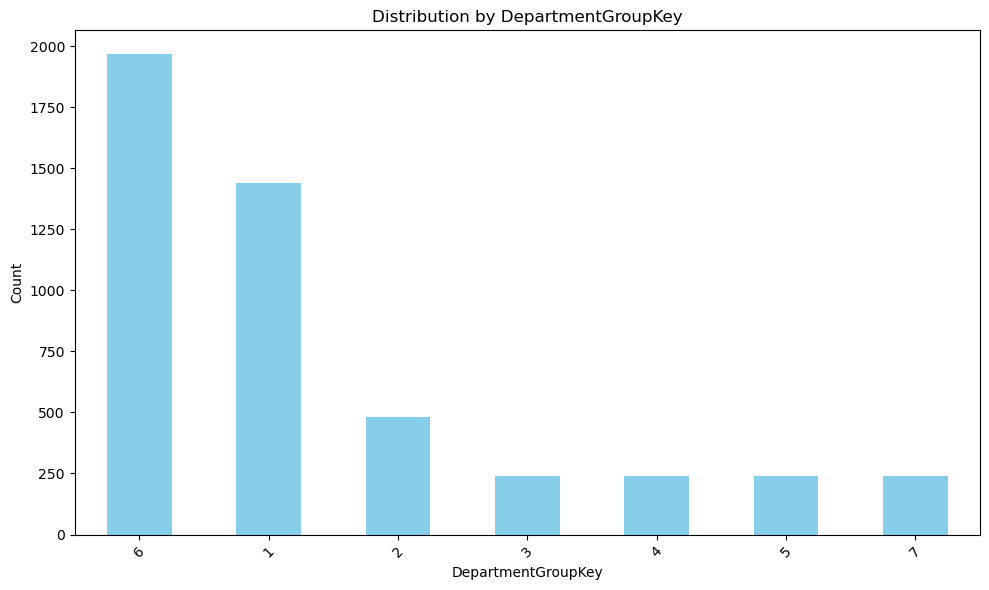

<Figure size 640x480 with 0 Axes>

In [11]:

# Function to plot distribution
def plot_distribution(data, title, xlabel, ylabel, kind="bar"):
    ax = data.plot(kind=kind, figsize=(10, 6), color='skyblue')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig("Distri_by_Department")

# Plot distributions

plot_distribution(departmentgroup_distribution, "Distribution by DepartmentGroupKey", "DepartmentGroupKey", "Count")



In [12]:
# Convertion de 'Date' en datetime format
budget['Date'] = pd.to_datetime(budget['Date'], format='%d/%m/%Y')

# Extraction des mois et années
budget['Year'] = budget['Date'].dt.year
budget['Month'] = budget['Date'].dt.month

# Grouper par année et mois 
time_series = budget.groupby(['Year', 'Month'])['Montant'].sum().reset_index()

# 
time_series.head()


Year  Month   Montant
0  2016      1  19968750
1  2016      2  46714500
2  2016      3  37373500
3  2016      4  25796300
4  2016      5  52255300

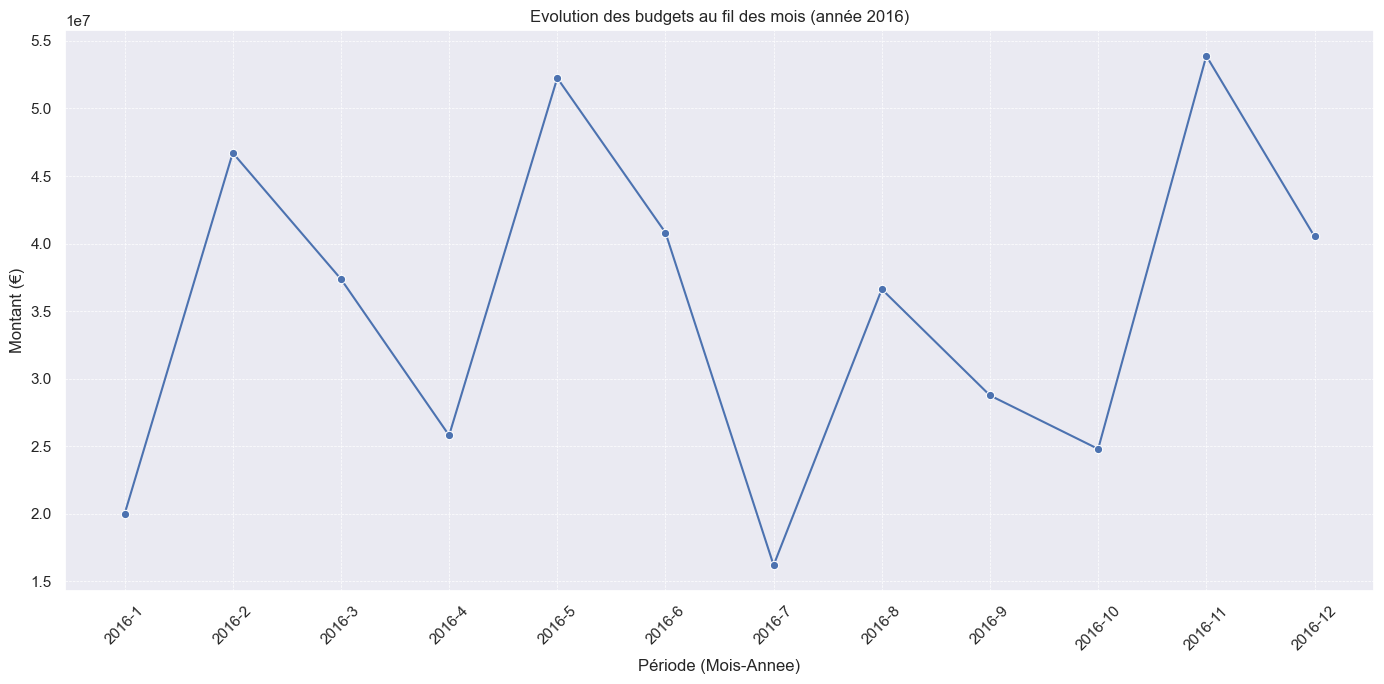

<Figure size 640x480 with 0 Axes>

In [13]:
# theme Seaborn  par défaut
sns.set_theme()

# Plotting the time series of expenses using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series, x=time_series['Year'].astype(str) + '-' + time_series['Month'].astype(str), y='Montant', marker='o')
plt.title('Evolution des budgets au fil des mois (année 2016)')
plt.xlabel('Période (Mois-Annee)')
plt.ylabel('Montant (€)')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
plt.savefig("evolution_budget")


In [14]:
# Convertion de 'DepartmentGroupKey' 
budget['DepartmentGroupKey'] = budget['DepartmentGroupKey'].astype(str)
services['DepartmentGroupKey'] = services['DepartmentGroupKey'].astype(str)

# jointure des dataframes on 'DepartmentGroupKey'
budget_services = pd.merge(budget, services, on='DepartmentGroupKey', how='left')

# affichage
budget_services.head()


ScenarioKey CodeInsee DepartmentGroupKey  AccountKey       Date  Montant  \
0            2     44109                  1          62 2016-01-01    14000   
1            2     44109                  1          65 2016-01-01     3750   
2            2     44109                  1          66 2016-01-01     5500   
3            2     44109                  1          67 2016-01-01     2800   
4            2     44109                  1          68 2016-01-01     2000   

   Year  Month   Service  
0  2016      1  Executif  
1  2016      1  Executif  
2  2016      1  Executif  
3  2016      1  Executif  
4  2016      1  Executif

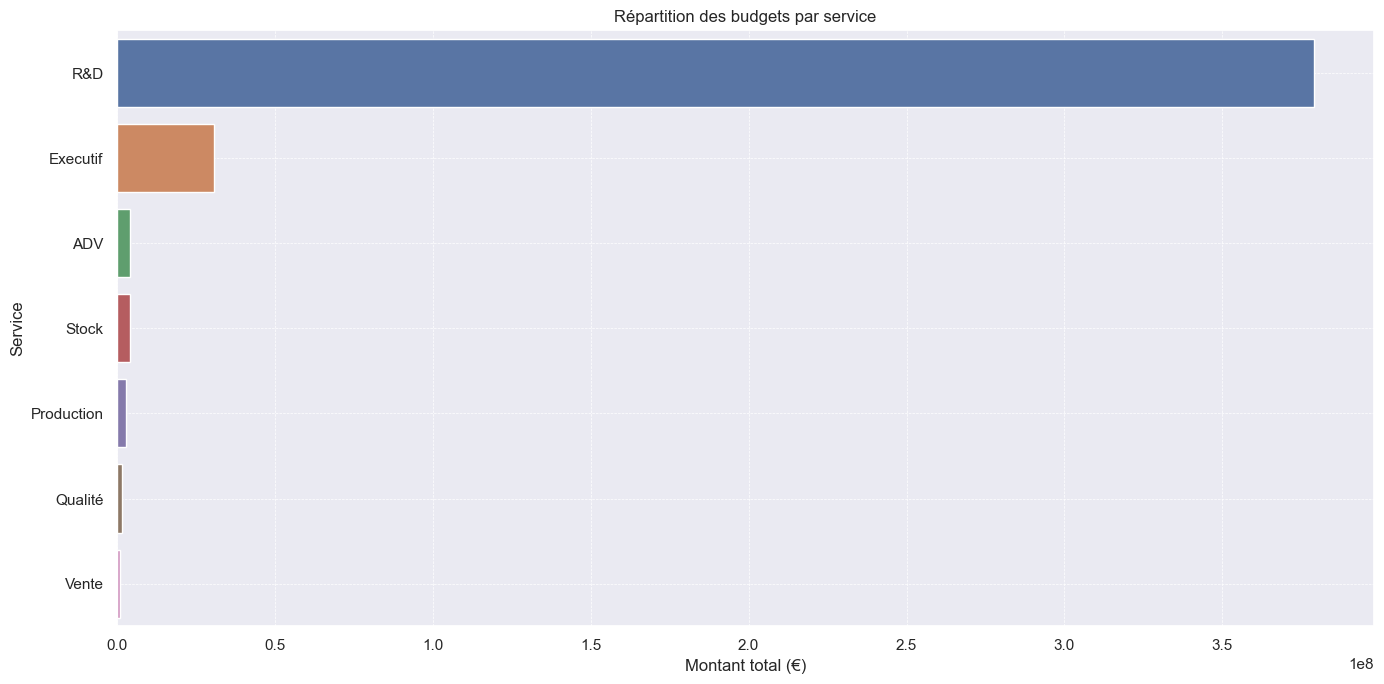

<Figure size 640x480 with 0 Axes>

In [15]:
# Regrouper par service et obtenir la somme des "Montant" pour chaque service
grouped_service = budget_services.groupby('Service')['Montant'].sum().sort_values(ascending=False).reset_index()

# Créer un diagramme à barres à l'aide de Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_service, x='Montant', y='Service')
plt.title('Répartition des budgets par service')
plt.xlabel('Montant total (€)')
plt.ylabel('Service')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
plt.savefig("budget_par_services")


In [16]:
all_conso = pd.concat([conso2014, conso2015, conso2016, conso2017], ignore_index=True) 
all_conso.sample(10)
all_conso.to_csv("all_conso.csv")

In [17]:
data = pd.read_csv('all_conso.csv')
data.head()

Unnamed: 0  ScenarioKey  CodeInsee  DepartmentGroupKey  AccountKey  Annee  \
0           0            1       6088                   1          60   2014   
1           1            1       6088                   1          61   2014   
2           2            1       6088                   1          62   2014   
3           3            1       6088                   1          65   2014   
4           4            1       6088                   1          66   2014   

       1      2      3      4      5       6      7      8      9     10  \
0  74195  71273  69758  87116  74195  105890  82968  87116  91472  96045   
1   6573   7930   7333   8579   6573   10428   8171   8579   9008   9459   
2   5548   5243   5159   7736   5548    9404   7368   7736   8123   8529   
3    957    963    907   1328    957    1614   1265   1328   1394   1464   
4    871    876    825   1206    871    1466   1149   1206   1267   1330   

       11      12  
0  100848  105890  
1    9931   10428  
2    8956    9404  
3    1537    1614  
4    1396    1466

In [18]:
data.drop("Unnamed: 0", axis=1 , inplace=True)
# Afficher les premières lignes pour avoir un aperçu

data["CodeInsee"] = data["CodeInsee"].astype(str)
data["CodeInsee"] = data["CodeInsee"].apply(lambda x: "0" + x if len(x) == 4 else x).astype(str)

data.head()


ScenarioKey CodeInsee  DepartmentGroupKey  AccountKey  Annee      1      2  \
0            1     06088                   1          60   2014  74195  71273   
1            1     06088                   1          61   2014   6573   7930   
2            1     06088                   1          62   2014   5548   5243   
3            1     06088                   1          65   2014    957    963   
4            1     06088                   1          66   2014    871    876   

       3      4      5       6      7      8      9     10      11      12  
0  69758  87116  74195  105890  82968  87116  91472  96045  100848  105890  
1   7333   8579   6573   10428   8171   8579   9008   9459    9931   10428  
2   5159   7736   5548    9404   7368   7736   8123   8529    8956    9404  
3    907   1328    957    1614   1265   1328   1394   1464    1537    1614  
4    825   1206    871    1466   1149   1206   1267   1330    1396    1466

In [19]:
# Remplacer les virgules par des points et convertir en float
for month in range(1, 13):
    data[str(month)] = data[str(month)].str.replace(',', '.').astype(float)

# Vérifier les changements en affichant à nouveau les premières lignes
data.head()


ScenarioKey CodeInsee  DepartmentGroupKey  AccountKey  Annee        1  \
0            1     06088                   1          60   2014  74195.0   
1            1     06088                   1          61   2014   6573.0   
2            1     06088                   1          62   2014   5548.0   
3            1     06088                   1          65   2014    957.0   
4            1     06088                   1          66   2014    871.0   

         2        3        4        5         6        7        8        9  \
0  71273.0  69758.0  87116.0  74195.0  105890.0  82968.0  87116.0  91472.0   
1   7930.0   7333.0   8579.0   6573.0   10428.0   8171.0   8579.0   9008.0   
2   5243.0   5159.0   7736.0   5548.0    9404.0   7368.0   7736.0   8123.0   
3    963.0    907.0   1328.0    957.0    1614.0   1265.0   1328.0   1394.0   
4    876.0    825.0   1206.0    871.0    1466.0   1149.0   1206.0   1267.0   

        10        11        12  
0  96045.0  100848.0  105890.0  
1   9459.0    9931.0   10428.0  
2   8529.0    8956.0    9404.0  
3   1464.0    1537.0    1614.0  
4   1330.0    1396.0    1466.0

In [20]:
# Somme de la consommation pour chaque année
annual_consumption = data.groupby('Annee').sum().iloc[:, 5:17].sum(axis=1)

# Affichage de la consommation annuelle
annual_consumption



C:\Users\brune\AppData\Local\Temp\ipykernel_19184\1625472053.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_consumption = data.groupby('Annee').sum().iloc[:, 5:17].sum(axis=1)


Annee
2014    1.423115e+09
2015    1.256621e+09
2016    1.427663e+09
2017    1.546113e+09
dtype: float64

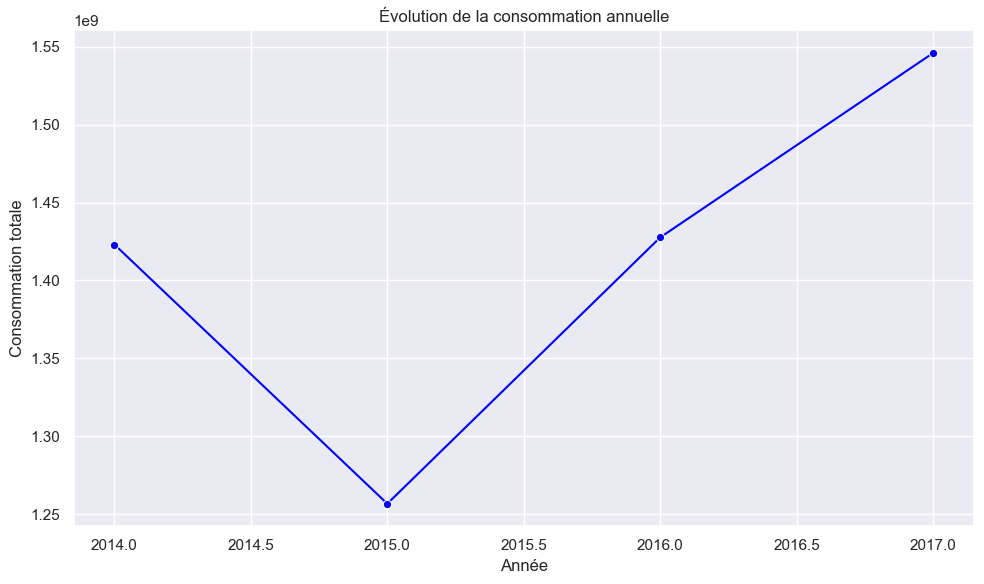

<Figure size 640x480 with 0 Axes>

In [21]:


# Créer la visualisation avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_consumption.index, y=annual_consumption, marker='o', color='blue')
plt.title("Évolution de la consommation annuelle")
plt.xlabel("Année")
plt.ylabel("Consommation totale")
plt.tight_layout()
plt.show()
plt.savefig("conso_par_an")


In [22]:
# Grouper par année et sommer les consommations pour chaque mois
monthly_consumption = data.groupby('Annee').sum().iloc[:, 3:16]

# Afficher les premières lignes pour vérifier
monthly_consumption.head()


C:\Users\brune\AppData\Local\Temp\ipykernel_19184\1073551443.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_consumption = data.groupby('Annee').sum().iloc[:, 3:16]


1             2             3             4             5  \
Annee                                                                         
2014   8.417750e+07  1.064754e+08  9.494336e+07  1.430944e+08  8.417750e+07   
2015   9.259525e+07  1.117992e+08  9.304450e+07  9.572640e+07  1.186659e+08   
2016   7.155088e+07  1.022164e+08  1.044377e+08  8.843296e+07  1.223742e+08   
2017   8.228351e+07  1.226597e+08  9.921582e+07  9.285461e+07  1.590865e+08   

                  6             7             8             9            10  \
Annee                                                                         
2014   1.739322e+08  1.362804e+08  1.430944e+08  1.502492e+08  1.577616e+08   
2015   1.284930e+08  1.226524e+07  1.788680e+08  1.126869e+08  1.545122e+08   
2016   1.362804e+08  1.430944e+08  1.502491e+08  1.427367e+08  1.814258e+08   
2017   1.499085e+08  1.287850e+08  1.802990e+08  1.784209e+08  1.850544e+08   

                 11            12  
Annee                              
2014   1.656497e+08  1.739322e+08  
2015   1.623367e+08  2.000220e+08  
2016   1.673062e+08  1.913254e+08  
2017   1.907290e+08  1.817591e+08

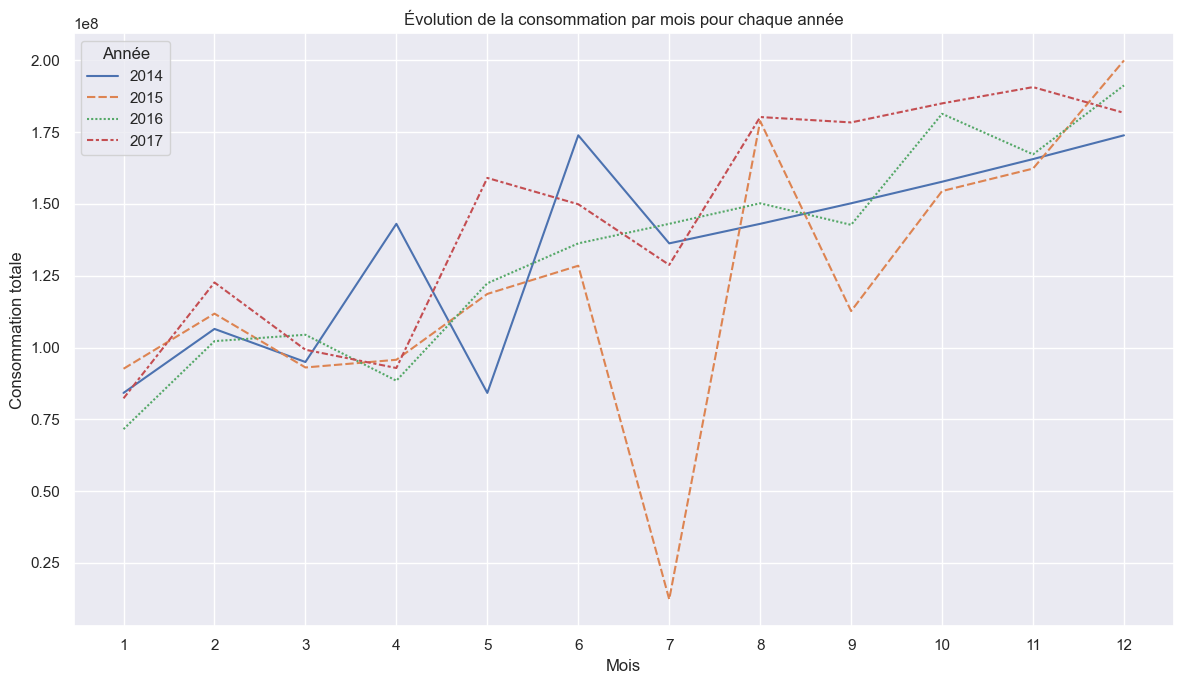

<Figure size 640x480 with 0 Axes>

In [23]:
# Tracer la visualisation de la consommation par mois pour chaque année
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_consumption.T)
plt.title("Évolution de la consommation par mois pour chaque année")
plt.xlabel("Mois")
plt.ylabel("Consommation totale")
plt.legend(title='Année')
plt.tight_layout()
plt.show()
plt.savefig("conso_par_an_par_mois")


In [24]:
data.iloc[:, 4:17]

Annee            1            2           3            4            5  \
0      2014   74195.0000    71273.000   69758.000   87116.0000    74195.000   
1      2014    6573.0000     7930.000    7333.000    8579.0000     6573.000   
2      2014    5548.0000     5243.000    5159.000    7736.0000     5548.000   
3      2014     957.0000      963.000     907.000    1328.0000      957.000   
4      2014     871.0000      876.000     825.000    1206.0000      871.000   
...     ...          ...          ...         ...          ...          ...   
4167   2017  119780.8950   178835.328  146900.875  145935.7725   179277.813   
4168   2017   21209.7950    25229.952   20583.365   21088.0425    25671.789   
4169   2017  227482.8225  1030916.736  -32953.030  118470.9015  1591765.461   
4170   2017  690245.9850  1039753.728  793761.100  605343.4380  1376382.150   
4171   2017   14733.8575    16647.552   13941.345   14836.4895    17990.973   

                6            7           8             9           10  \
0      105890.000    82968.000    87116.00  9.147200e+04    96045.000   
1       10428.000     8171.000     8579.00  9.008000e+03     9459.000   
2        9404.000     7368.000     7736.00  8.123000e+03     8529.000   
3        1614.000     1265.000     1328.00  1.394000e+03     1464.000   
4        1466.000     1149.000     1206.00  1.267000e+03     1330.000   
...           ...          ...         ...           ...          ...   
4167   168934.920   145130.265   203182.56  2.010663e+05   208541.805   
4168    24190.320    20782.440    29094.66  2.879212e+04    29862.234   
4169  1499932.665  1288578.375  1804010.04  1.785219e+06  1851591.057   
4170  1296976.065  1114220.205  1559907.72  1.543659e+06  1601049.987   
4171    16953.090    14564.340    20389.32  2.017800e+04    20927.493   

                11           12  
0     1.008480e+05   105890.000  
1     9.931000e+03    10428.000  
2     8.956000e+03     9404.000  
3     1.537000e+03     1614.000  
4     1.396000e+03     1466.000  
...            ...          ...  
4167  2.149364e+05   204828.360  
4168  3.077807e+04    29330.015  
4169  1.908370e+06  1818619.770  
4170  1.650146e+06  1572541.080  
4171  2.156918e+04    20555.150  

[4172 rows x 13 columns]

In [25]:
# Vérifier le type de données de la colonne DepartmentGroupKey dans les deux dataframes
data_type_data = data["DepartmentGroupKey"].dtype
data_type_services = services["DepartmentGroupKey"].dtype

data_type_data, data_type_services


(dtype('int64'), dtype('O'))

In [26]:
services["DepartmentGroupKey"] = services["DepartmentGroupKey"].astype(int)

# Fusionner data et services sur DepartmentGroupKey
merged_data = pd.merge(data, services, on="DepartmentGroupKey", how="left")

# Regrouper par Service et sommer les consommations pour chaque mois
consumption_by_service = merged_data.groupby('Service').sum().iloc[:, 3:17].sum(axis=1)

# Afficher la consommation par service
consumption_by_service


C:\Users\brune\AppData\Local\Temp\ipykernel_19184\4193213251.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumption_by_service = merged_data.groupby('Service').sum().iloc[:, 3:17].sum(axis=1)


Service
ADV           2.001121e+08
Executif      8.980124e+07
Production    7.139189e+06
Qualité       3.938523e+06
R&D           9.515590e+08
Stock         4.434074e+08
Vente         4.739721e+09
dtype: float64

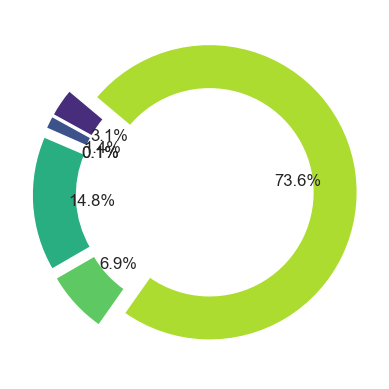

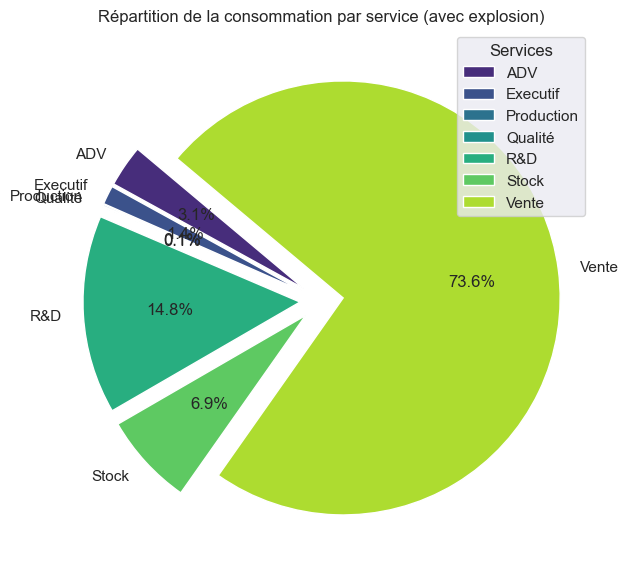

<Figure size 640x480 with 0 Axes>

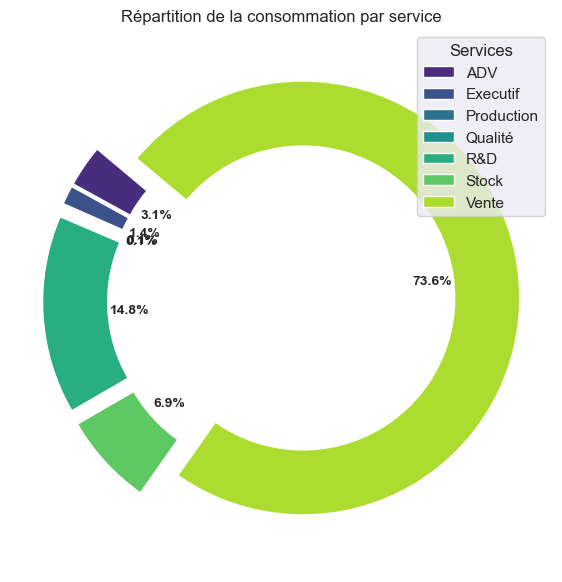

<Figure size 640x480 with 0 Axes>

In [27]:
# Créer un effet d'explosion pour toutes les sections
explode = [0.1] * len(consumption_by_service)
text_properties = {'fontsize': 12}
wedges, texts, autotexts = plt.pie(consumption_by_service, autopct='%1.1f%%', startangle=140, explode=explode, colors=sns.color_palette("viridis", len(consumption_by_service)), textprops=text_properties, wedgeprops=dict(width=0.3))

# Diagramme en secteur avec l'effet explode
plt.figure(figsize=(7, 10))
plt.pie(consumption_by_service, labels=consumption_by_service.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=sns.color_palette("viridis", len(consumption_by_service)))
plt.title("Répartition de la consommation par service (avec explosion)")
plt.legend(wedges, consumption_by_service.index, title="Services", loc="best")
plt.show()
plt.savefig("conso_service_diag_anneau")

# Diagramme en anneau pour la consommation par service avec une légende

plt.figure(figsize=(7, 10))
wedges, texts, autotexts = plt.pie(consumption_by_service, autopct='%1.1f%%', startangle=140, explode=explode, colors=sns.color_palette("viridis", len(consumption_by_service)), textprops=text_properties, wedgeprops=dict(width=0.3))
plt.title("Répartition de la consommation par service")
plt.legend(wedges, consumption_by_service.index, title="Services", loc="best")
plt.setp(autotexts, size=10, weight="bold")
plt.show()
plt.savefig("conso_service_diag_secteur")


In [28]:

# Fusionner les dataframes data et comptes pour associer AccountKey à Poste
merged_data_poste = pd.merge(data, comptes, left_on="AccountKey", right_on="AccountKey", how="left")

# Regrouper par Poste et sommer les consommations pour chaque mois
consumption_by_poste = merged_data_poste.groupby('Poste').sum().iloc[:, 5:17].sum(axis=1)

# Afficher la consommation par poste
consumption_by_poste


C:\Users\brune\AppData\Local\Temp\ipykernel_19184\2204827171.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumption_by_poste = merged_data_poste.groupby('Poste').sum().iloc[:, 5:17].sum(axis=1)


Poste
Autres actifs                  5.141042e+05
Autres dépenses                7.402522e+05
Autres dépenses Voyage         1.722141e+05
Ch. sociales                   1.294906e+07
Divertissement                 5.745881e+05
Dotation aux amortissements    5.174362e+05
Equipement                     1.797428e+05
Evenementiel                   2.854003e+05
Fournitures de bureau          1.092064e+06
Hebergement                    1.516300e+06
Impôts                         3.574340e+07
Intérêts bancaire              9.563583e+05
Location locaux                2.674581e+06
Locations divers               2.271543e+06
Marketing                      1.006900e+07
Marketing annexe               9.545380e+05
Mobilier                       5.894804e+05
Primes                         1.506160e+07
Repas                          7.737750e+05
Salaires                       1.249898e+08
Services professionnels        1.197107e+06
Services public                2.277650e+06
Transport                 

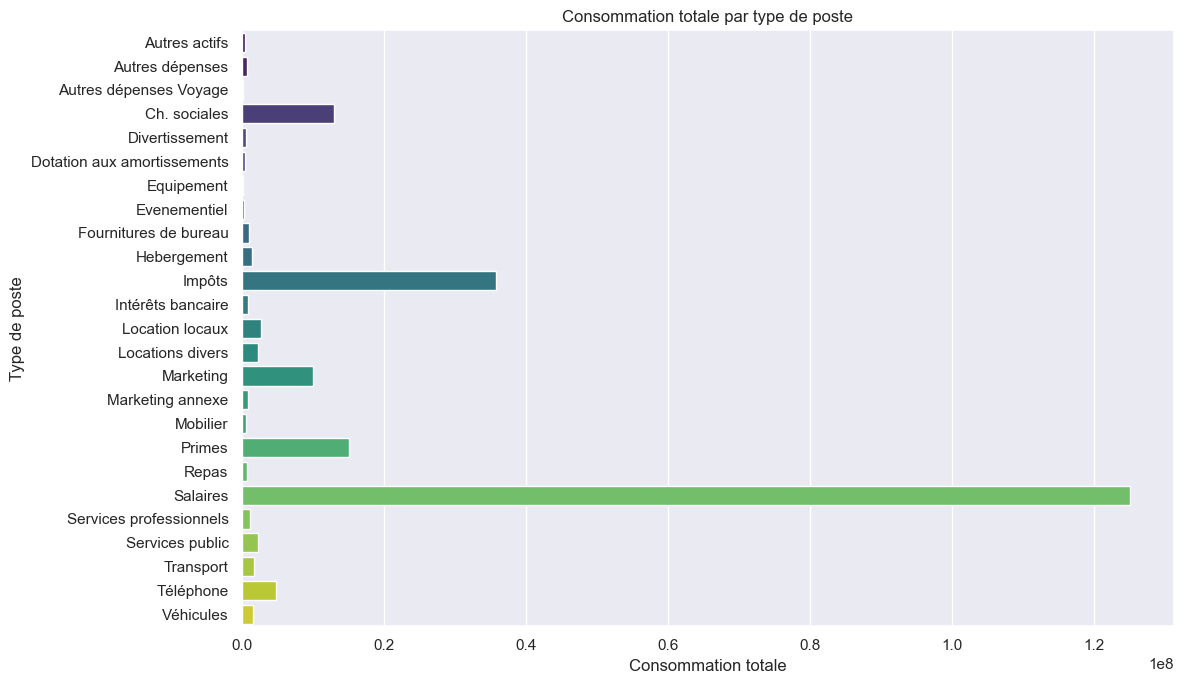

<Figure size 640x480 with 0 Axes>

In [29]:
# Trier les valeurs par consommation
consumption_by_poste = consumption_by_poste
# Diagramme à barres horizontales
plt.figure(figsize=(12, 7))
sns.barplot(x=consumption_by_poste.values, y=consumption_by_poste.index, palette="viridis")
plt.title("Consommation totale par type de poste")
plt.xlabel("Consommation totale")
plt.ylabel("Type de poste")
plt.tight_layout()
plt.show()
plt.savefig("conso_poste")



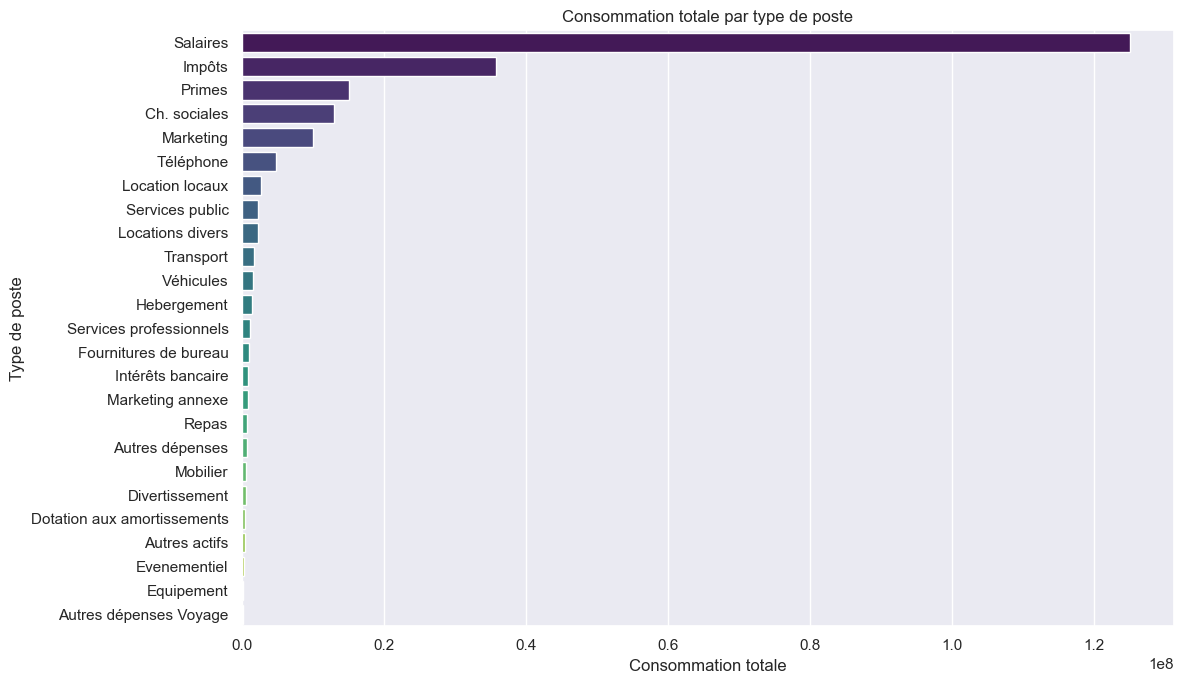

<Figure size 640x480 with 0 Axes>

In [30]:
# Trier les valeurs par consommation
sorted_consumption_by_poste = consumption_by_poste.sort_values(ascending=False)

# Diagramme à barres horizontales
plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_consumption_by_poste.values, y=sorted_consumption_by_poste.index, palette="viridis")
plt.title("Consommation totale par type de poste")
plt.xlabel("Consommation totale")
plt.ylabel("Type de poste")
plt.tight_layout()
plt.show()
plt.savefig("conso_poste_trie")



In [31]:
import plotly.graph_objects as go
import kaleido
#!pip install kaleido

sites["CodeInsee"] = sites["CodeInsee"].astype(int)

data["CodeInsee"] = data["CodeInsee"].astype(int)

# Calculer la consommation totale en 2017
merged_data_departement = pd.merge(data, sites[['CodeInsee', 'Departement']], on="CodeInsee", how="left")
total_conso_2017 = merged_data_departement[merged_data_departement["Annee"] == 2017].iloc[:, 5:17].sum().sum()

# Créer la jauge
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = total_conso_2017,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Consommation totale en 2017"},
    gauge = {
        'axis': {'range': [None, 1.2 * total_conso_2017]},
        'steps': [
            {'range': [0, 0.6 * total_conso_2017], 'color': "lightgray"},
            {'range': [0.6 * total_conso_2017, 0.9 * total_conso_2017], 'color': "gray"},
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': total_conso_2017}}))

fig.show()
#fig.write_image("conso_jauge.png")

In [32]:
# Calculer la consommation totale pour chaque année dans le dataframe data
consumption_per_year = data.groupby('Annee').sum().iloc[:, 5:17].sum(axis=1)

# Calculer le budget total pour chaque année dans le dataframe budget (en considérant que le budget est le même chaque année)
total_budget = budget['Montant'].sum()

# Calculer l'écart entre la consommation et le budget pour chaque année
budget_difference = consumption_per_year - total_budget

# Afficher l'écart par rapport au budget pour chaque année
#budget_difference


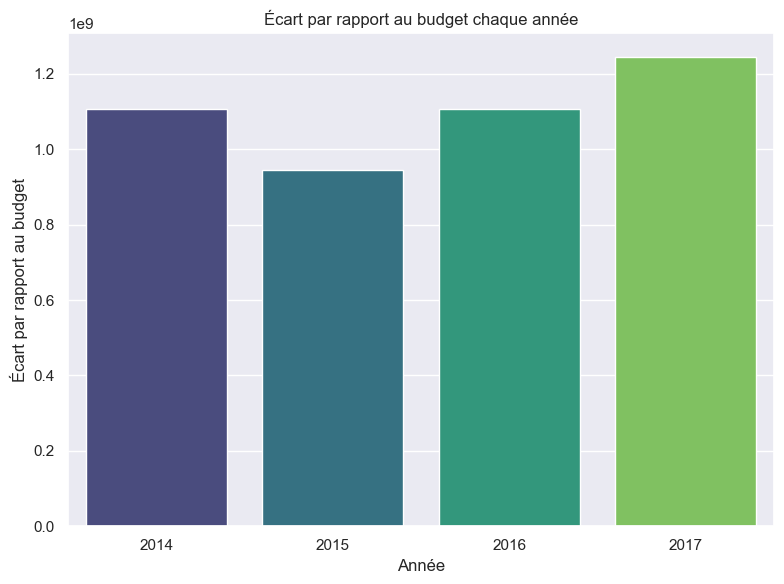

In [33]:
# Diagramme à barres pour visualiser l'écart par rapport au budget chaque année
plt.figure(figsize=(8, 6))
sns.barplot(x=budget_difference.index, y=budget_difference.values, palette="viridis")
plt.title("Écart par rapport au budget chaque année")
plt.xlabel("Année")
plt.ylabel("Écart par rapport au budget")
plt.tight_layout()
plt.show()


In [34]:
# Modifier la colonne CodeInsee du dataframe sites
sites["CodeInsee"] = sites["CodeInsee"].astype(str)
sites["CodeInsee"] = sites["CodeInsee"].apply(lambda x: "0" + x if len(x) == 4 else x)

# Afficher les premières lignes pour vérifier les modifications
sites.sample(10)


CodeInsee              Commune          Departement  \
531     34003                 Agde              Hérault   
751     66037  Canet-en-Roussillon  Pyrénées-Orientales   
374     10033         Bar-sur-Aube                   10   
14      77284                Meaux       Seine-et-Marne   
691     57618          Saint-Louis              Moselle   
137     93063          Romainville    Seine-Saint-Denis   
716     61006             Argentan                 Orne   
842     76447        Montivilliers       Seine-Maritime   
367     08409                Sedan             Ardennes   
700     58102                Donzy               Nièvre   

                      Region  
531                Occitanie  
751                Occitanie  
374                Grand Est  
14             Ile de France  
691                Grand Est  
137            Ile de France  
716                Normandie  
842                Normandie  
367                Grand Est  
700  Bourgogne-Franche-Comté

In [35]:
sites["Departement"] = sites["Departement"].replace(dict_replace)
sites.Departement.unique()

array(['Paris', 'Seine-et-Marne', 'Yvelines', 'Essone', 'Hauts-de-Seine',
       'Seine-Saint-Denis', 'Val-de-Marne', "Val d'oise", 'Nord',
       'Pas-de-Calais', 'Alpes-de-Haute-Provence', 'Hautes-Alpes',
       'Alpes-Maritimes', 13, 'Var', 'Vaucluse', 'Ain', 'Aisne', 'Allier',
       'Ardèche', 'Ardennes', 'Ariège', 10, 11, 12, 'Calvados', 'Cantal',
       'Charente', 'Charente-Maritime', 'Cher', 'Corrèze', "Côte-d'Or",
       "Côtes-d'Armor", 'Creuse', 'Dordogne', 'Doubs', 'Drôme', 'Eure',
       'Eure-et-Loir', 'Finistère', 'Gard', 'Haute-Garonne', 'Gers',
       'Hérault', 'Ille-et-Vilaine', 'Indre', 'Indre-et-Loire', 'Isère',
       'Jura', 'Landes', 'Loir-et-Cher', 'Loire', 'Haute-Loire',
       'Loire-Atlantique', 'Loiret', 'Lot', 'Lot-et-Garonne', 'Lozère',
       'Maine-et-Loire', 'Manche', 'Haute-Marne', 'Mayenne',
       'Meurthe-et-Moselle', 'Meuse', 'Morbihan', 'Moselle', 'Nièvre',
       'Oise', 'Orne', 'Puy-de-Dôme', 'Pyrénées-Atlantiques',
       'Hautes-Pyrénées', '

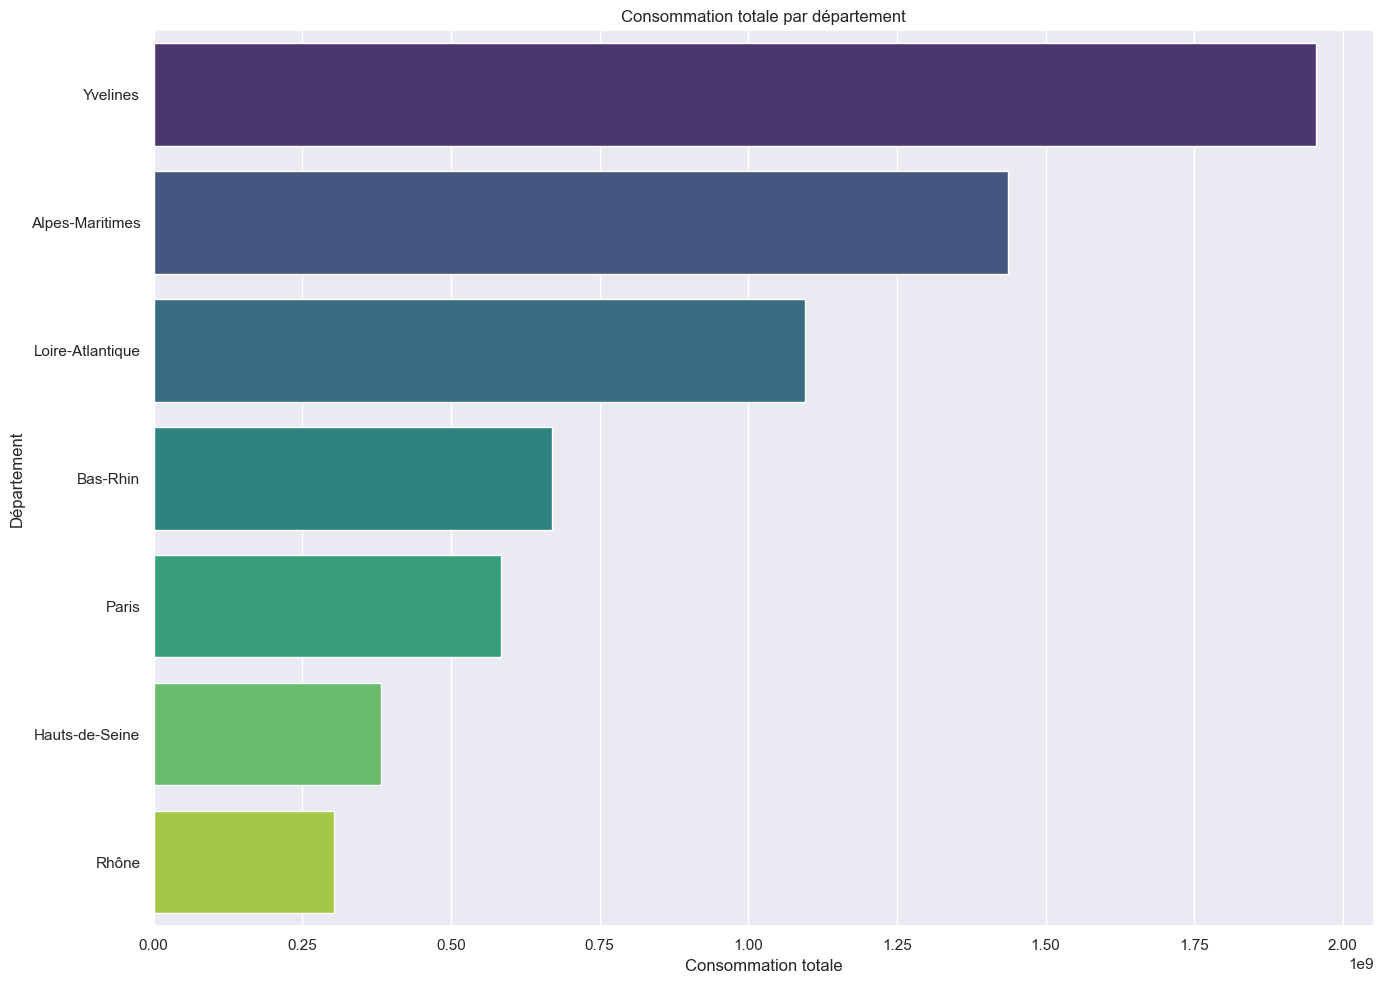

In [36]:
# Convertir la colonne CodeInsee du dataframe sites en int64
sites["CodeInsee"] = sites["CodeInsee"].astype(int)

data["CodeInsee"] = data["CodeInsee"].astype(int)

# Fusionner à nouveau les dataframes
merged_data_departement = pd.merge(data, sites[['CodeInsee', 'Departement']], on="CodeInsee", how="left")

# Regrouper par Departement et sommer les consommations pour chaque mois
consumption_by_departement = merged_data_departement.groupby('Departement').sum().iloc[:, 5:17].sum(axis=1).sort_values(ascending=False)

# Diagramme à barres pour visualiser la consommation par département
plt.figure(figsize=(14, 10))
sns.barplot(y=consumption_by_departement.index, x=consumption_by_departement.values, palette="viridis")
plt.title("Consommation totale par département")
plt.ylabel("Département")
plt.xlabel("Consommation totale")
plt.tight_layout()
plt.show()


In [37]:
# Regrouper les données par CodeInsee et sommer la consommation pour chaque mois
consumption_by_codeinsee = merged_data_departement.groupby('CodeInsee').sum().iloc[:, 5:17].sum(axis=1)

# Convertir le CodeInsee en string pour l'utiliser avec Plotly
consumption_by_codeinsee.index = consumption_by_codeinsee.index.astype(str)

# Vérifier les premières entrées des données préparées
consumption_by_codeinsee.head()


C:\Users\brune\AppData\Local\Temp\ipykernel_19184\2847228493.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



CodeInsee
6088     1.376600e+09
44109    1.040910e+09
67482    6.293076e+08
69123    2.860163e+08
75056    5.462884e+08
dtype: float64

In [38]:
#!pip install bokeh
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook
from bokeh.palettes import Viridis256
from bokeh.models import ColorBar, LinearColorMapper
from bokeh.layouts import column

# Charger à nouveau le fichier geojson
with open("departements-version-simplifiee.geojson.txt", "r") as file:
    geojson_departements = json.load(file)
    min_val = consumption_by_codeinsee.min()
    max_val = consumption_by_codeinsee.max()
    color_mapper = LinearColorMapper(palette=Viridis256, low=min_val, high=max_val)

# Ajouter les valeurs de consommation dans les données GeoJSON
for feature in geojson_departements['features']:
    code = feature['properties']['code']
    if code in consumption_by_codeinsee:
        feature['properties']['consommation'] = consumption_by_codeinsee[code]
    else:
        feature['properties']['consommation'] = 0  # Si nous n'avons pas de données pour ce département, mettre la consommation à 0

# Convertir le dataframe de consommation mis à jour en source de données pour Bokeh
source = GeoJSONDataSource(geojson=json.dumps(geojson_departements))

# Créer la figure avec la propriété correcte pour définir la hauteur
p = figure(title="Consommation totale par département", 
           height=600, 
           width=900,
           tools="pan,reset,save,wheel_zoom,box_zoom")

# Ajouter les polygones représentant les départements
p.patches('xs', 'ys', source=source, 
          fill_color={'field': 'consommation', 'transform': color_mapper},
          line_color='white', line_width=0.5)

# Ajouter une barre de couleur
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20, location=(0,0), orientation='horizontal')
p.add_layout(color_bar, 'below')

# Afficher la figure
output_notebook()
show(p, notebook_handle=True)


Loading BokehJS ...